In [108]:
import pandas as pd
import os

In [109]:
csv = pd.read_csv("/Users/lucasdiniz/git/mqtt-api/results/results.csv")
csv.DURATION_ACK = csv.DURATION_ACK / 10 ** 3

Text(0.5,0,'(Protocol, Message Size)')

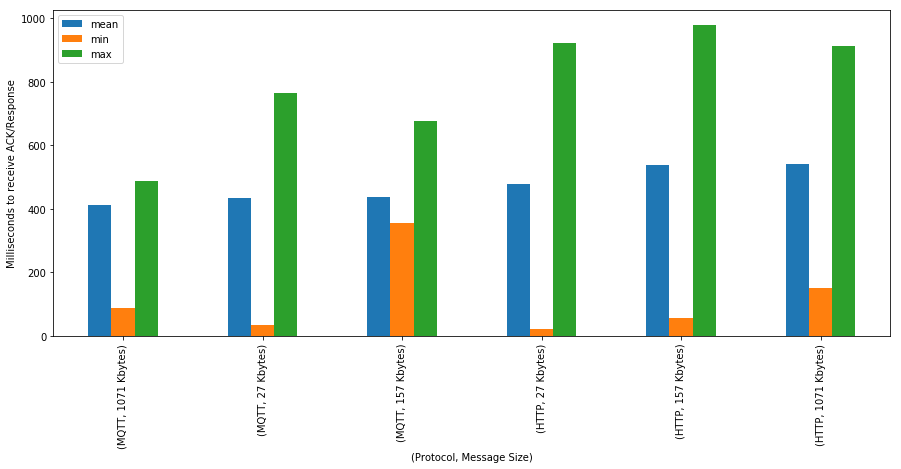

In [110]:
df = pd.DataFrame(csv)
df['MESSAGE_SIZE'] = df['MESSAGE_SIZE'].apply(lambda x: "%d Kbytes" % (int(x)/1000))
df_agg = df.groupby(['PROTOCOL', 'MESSAGE_SIZE'])['DURATION_ACK'].agg(['mean', 'min', 'max']).sort_values('mean')
ax = df_agg.plot.bar(figsize=(15,6))
ax.set_ylabel("Milliseconds to receive ACK/Response")
ax.set_xlabel("(Protocol, Message Size)")